In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h1>Determine Optimal Clusters (Elbow Method)</h1>

C:\Users\ahsan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahsan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahsan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahsan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

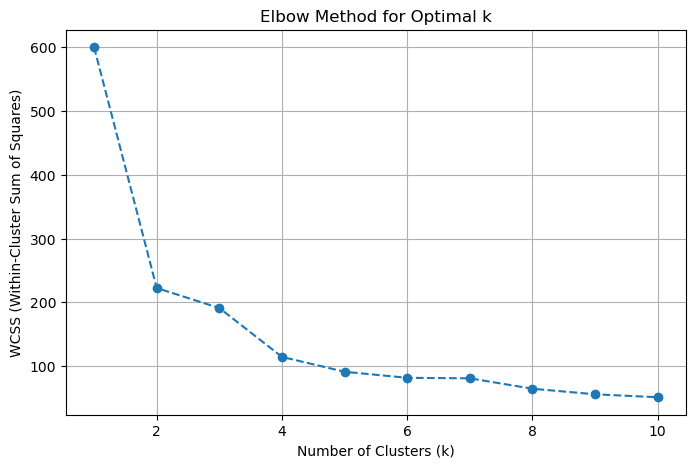

In [4]:

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

<h1>Apply K-Means Clustering</h1>

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


print("Cluster Assignments:", clusters[:10]) 
print("True Labels:", y[:10])

Cluster Assignments: [1 2 2 2 1 1 1 1 2 2]
True Labels: [0 0 0 0 0 0 0 0 0 0]


C:\Users\ahsan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<h1>Visualize Clusters</h1>

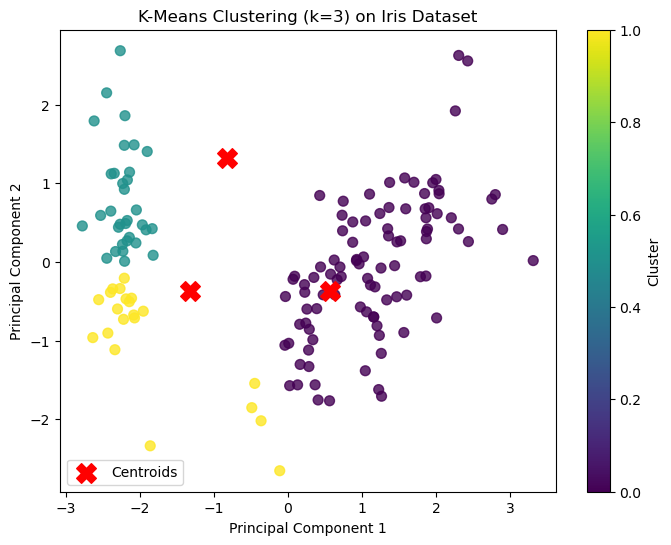

In [16]:
from sklearn.decomposition import PCA

# Reduce to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering (k=3) on Iris Dataset')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()


<h1>Evaluate Clustering Performance</h1>
<h1>A. Adjusted Rand Index (ARI)</h1>

In [19]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(y, clusters)
print(f"Adjusted Rand Index: {ari:.2f}")  # Output: ~0.73 (good match)

Adjusted Rand Index: 0.43


<h1>B).Silhouette Score</h1>

In [22]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette:.2f}")  # Output: ~0.55 (reasonable structure)

Silhouette Score: 0.48
